In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

2022-09-30 11:36:26.757384: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-30 11:36:26.763367: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-30 11:36:26.763392: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
from sklearn import datasets


In [5]:
data_c,data_c_1 =datasets.make_circles(n_samples=1000)

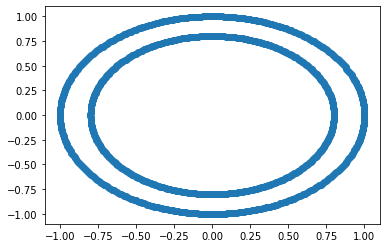

In [6]:
plt.scatter(data_c[:,0],data_c[:,1])

In [7]:
import tensorflow as tf

In [8]:
data_c.shape

(1000, 2)

In [9]:
model = tf.keras.models.Sequential()

2022-09-30 11:36:53.606554: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-30 11:36:53.606635: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-30 11:36:53.606748: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost.localdomain): /proc/driver/nvidia/version does not exist
2022-09-30 11:36:53.607998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.add(tf.keras.layers.Dense(16,activation='relu',input_shape=(2,)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=["acc"])

In [13]:
his=model.fit(data_c,data_c_1,epochs=1000,batch_size=64)

Epoch 1/1000
16/16 [==============================] - 1s 3ms/step - loss: 0.7136 - acc: 0.4960
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.7089 - acc: 0.4960
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.7051 - acc: 0.4990
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.7024 - acc: 0.4980
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7005 - acc: 0.4930
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.6987 - acc: 0.4970
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6972 - acc: 0.4940
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6960 - acc: 0.4970
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6948 - acc: 0.4950
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6938 - acc: 0.4940
Epoch 11/1000
16/16 [============================

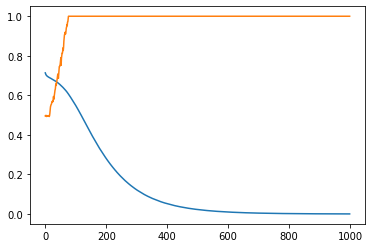

In [14]:
plt.plot(his.epoch,his.history.get("loss"))
plt.plot(his.epoch,his.history.get("acc"))

In [15]:
pre = model.predict(data_c)

32/32 [==============================] - 0s 2ms/step


In [16]:
pre

array([[2.1885657e-04],
       [9.9985129e-01],
       [9.9970567e-01],
       [9.9934757e-01],
       [9.9926722e-01],
       [1.3869535e-04],
       [9.9952465e-01],
       [3.7533051e-04],
       [9.9971396e-01],
       [5.0773751e-04],
       [2.5477022e-04],
       [3.9586905e-04],
       [2.4749842e-04],
       [4.1731776e-04],
       [3.0079094e-04],
       [2.2283259e-04],
       [9.9970311e-01],
       [4.4510726e-04],
       [9.9932611e-01],
       [9.9944586e-01],
       [9.9960411e-01],
       [4.1201300e-04],
       [1.6721290e-04],
       [9.9944860e-01],
       [3.9182621e-04],
       [2.9042296e-04],
       [9.9933898e-01],
       [2.7813701e-04],
       [9.9956673e-01],
       [9.9947327e-01],
       [3.3601545e-04],
       [3.5938408e-04],
       [9.9930990e-01],
       [7.2551274e-04],
       [9.9969280e-01],
       [9.9964690e-01],
       [2.7676468e-04],
       [9.9962622e-01],
       [9.9938399e-01],
       [9.9950314e-01],
       [9.9930322e-01],
       [4.594401

In [17]:
pred = [int(i>0.5) for i in pre]

In [18]:
pre

array([[2.1885657e-04],
       [9.9985129e-01],
       [9.9970567e-01],
       [9.9934757e-01],
       [9.9926722e-01],
       [1.3869535e-04],
       [9.9952465e-01],
       [3.7533051e-04],
       [9.9971396e-01],
       [5.0773751e-04],
       [2.5477022e-04],
       [3.9586905e-04],
       [2.4749842e-04],
       [4.1731776e-04],
       [3.0079094e-04],
       [2.2283259e-04],
       [9.9970311e-01],
       [4.4510726e-04],
       [9.9932611e-01],
       [9.9944586e-01],
       [9.9960411e-01],
       [4.1201300e-04],
       [1.6721290e-04],
       [9.9944860e-01],
       [3.9182621e-04],
       [2.9042296e-04],
       [9.9933898e-01],
       [2.7813701e-04],
       [9.9956673e-01],
       [9.9947327e-01],
       [3.3601545e-04],
       [3.5938408e-04],
       [9.9930990e-01],
       [7.2551274e-04],
       [9.9969280e-01],
       [9.9964690e-01],
       [2.7676468e-04],
       [9.9962622e-01],
       [9.9938399e-01],
       [9.9950314e-01],
       [9.9930322e-01],
       [4.594401

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(data_c_1,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [21]:
data_t,data_t_1 = datasets.make_circles(n_samples=1000)

In [22]:
pre = model.predict(data_t)

32/32 [==============================] - 0s 2ms/step


In [23]:
pred = [int(i>0.5) for i in pre]

In [24]:
print(classification_report(data_t_1,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

